## Classification Exercises

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
from env import get_db_url
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

### Acquire

1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [2]:
#pull the data from pydataset into a dataframe
df_iris = data('iris')

In [3]:
#view the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
#print the column names
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [5]:
#print the data types of each column
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [6]:
#print the descriptive stats
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
##

2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [13]:
#read the .xlsx file into pandas
cust_details = pd.read_excel('custdetails.xlsx')
cust_details.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,267.40,Yes


In [14]:
#assign the first 100 rows to a new dataframe
df_excel_sample = cust_details.head(100)

In [16]:
#shape of new dataframe - 100 rows by 12 columns
df_excel_sample.shape

(100, 12)

In [17]:
#shape of original dataframe - 7049 rows by 12 columns
cust_details.shape

(7049, 12)

In [18]:
#number of rows in the original dataframe
cust_details.shape[0]

7049

In [19]:
#print the first 5 column names
cust_details.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [22]:
#print the column names that have a dtype of 'object'
cust_details.select_dtypes('object').columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [23]:
#compute the range for each of the numeric variables
cust_details.dtypes

customer_id           object
gender                object
is_senior_citizen    float64
partner               object
dependents            object
phone_service        float64
internet_service     float64
contract_type        float64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [24]:
cust_details.is_senior_citizen.max() - cust_details.is_senior_citizen.min()

1.0

In [25]:
cust_details.phone_service.max() - cust_details.phone_service.min()

2.0

In [26]:
cust_details.internet_service.max() - cust_details.internet_service.min()

2.0

In [27]:
cust_details.contract_type.max() - cust_details.contract_type.min()

2.0

In [29]:
cust_details.monthly_charges.max() - cust_details.monthly_charges.min()

100.5

In [30]:
cust_details.total_charges.max() - cust_details.total_charges.min()

8666.0

In [73]:
#run the above all together (for all numeric columns)
cust_details.select_dtypes('float64').apply(lambda x: x.max() - x.min(), axis=0)

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

3. Read the data from this google sheet into a dataframe, df_google

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [32]:
#read the google sheet into the notebook
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)


In [34]:
#print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [35]:
#print the number of rows and columns - 891 rows, 12 columns
df_google.shape

(891, 12)

In [36]:
#print the column names
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
#print the data types of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [39]:
#print the summary statistics for each of the numeric variables
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
#print the unique values for each of your categorical variables
#Pclass unique values
df_google.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [63]:
#Sex unique values
df_google.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [64]:
#Embarked unique values
df_google.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [65]:
#Survived unique values
df_google.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [67]:
#sibsp unique values
df_google.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [68]:
#parch unique values
df_google.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [74]:
#unique values for 'object' type
df_google.select_dtypes('object').apply(lambda x: x.unique().tolist())

Name        [Braund, Mr. Owen Harris, Cumings, Mrs. John Bradley (Florence Briggs Thayer), Heikkin...
Sex                                                                                    [male, female]
Ticket      [A/5 21171, PC 17599, STON/O2. 3101282, 113803, 373450, 330877, 17463, 349909, 347742,...
Cabin       [nan, C85, C123, E46, G6, C103, D56, A6, C23 C25 C27, B78, D33, B30, C52, B28, C83, F3...
Embarked                                                                               [S, C, Q, nan]
dtype: object

In [75]:
#unique values for 'integer' type
df_google.select_dtypes('integer').apply(lambda x: x.unique().tolist())

PassengerId    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24...
Survived                                                                                          [0, 1]
Pclass                                                                                         [3, 1, 2]
SibSp                                                                              [1, 0, 3, 4, 2, 5, 8]
Parch                                                                              [0, 1, 2, 5, 3, 4, 6]
dtype: object

### Build data aquisition functions for aquire.py file

In [3]:
from env import get_db_url
import os

In [26]:
#Get the Titanic data from database

def get_titanic_data():
    filename = 'titanic.csv'
    
    if os.path.exists(filename):
        print('Reading from csv file...')
        return pd.read_csv(filename)
    
    print('Getting a fresh copy from SQL database...')
    df = pd.read_sql('SELECT * FROM passengers', get_db_url('titanic_db'))
    df.to_csv(filename, index=False)
    return df  

In [53]:
get_titanic_data().head()

Reading from csv file...


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
#get the iris dataset and include species names

def get_iris_data():
    filename = 'iris.csv'
    
    if os.path.exists(filename):
        print('Reading from csv file...')
        return pd.read_csv(filename)
    
    print('Getting a fresh copy from SQL database...')
    df = pd.read_sql('SELECT * FROM measurements JOIN species USING(species_id)', get_db_url('iris_db'))
    df.to_csv(filename, index=False)
    return df  

get_iris_data().head()

Reading from csv file...


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [3]:
#Get the Telco data from the database and join all four tables into the one dataframe

def get_telco_data():
    filename = 'telco.csv'
    
    if os.path.exists(filename):
        print('Reading from csv file...')
        return pd.read_csv(filename)
    
    query = '''
    SELECT * FROM customers
    JOIN contract_types USING (contract_type_id)
    JOIN internet_service_types USING (internet_service_type_id)
    JOIN payment_types USING (payment_type_id)
    '''
    
    print('Getting a fresh copy from SQL database...')
    df = pd.read_sql(query, get_db_url('telco_churn'))
    df.to_csv(filename, index=False)
    return df  

get_telco_data().head()


Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


---

### Data Preparation

Using the Iris Data:

- Use the function defined in acquire.py to load the iris data.

- Drop the species_id and measurement_id columns.

- Rename the species_name column to just species.

- Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [5]:
#after running the above function to pull the iris data, verify the data pull with .head()
get_iris_data().head()

Reading from csv file...


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [6]:
#assign the dataset to a variable
df = get_iris_data()

Reading from csv file...


In [7]:
#review returned df
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [9]:
#drop the species_id and measurement_id coulmns
columns_to_drop = ['species_id', 'measurement_id']
df = df.drop(columns = columns_to_drop)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
#rename the species_name column to just 'species'
df = df.rename(columns = {'species_name': 'species'})
#review returned df
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
#Create dummy variables of the species name and concatenate onto the iris dataframe.
dummy_df = pd.get_dummies(df[['species']], drop_first = True)
#review returned df
dummy_df.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [19]:
#concatenate the dummy df onto the iris dataframe
df = pd.concat([df, dummy_df], axis=1)
#review returned df
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [30]:
#Create a function named prep_iris that accepts the untransformed iris data, 
#and returns the data with the transformations above applied.
df = get_iris_data()

def prep_iris(df):
    '''
    takes in a dataframe of the iris dataset and returns a cleaned dataframe
    with id columns removed and iris species encoded
    '''
    columns_to_drop = ['species_id', 'measurement_id']
    df = df.drop(columns = columns_to_drop)
    df = df.rename(columns = {'species_name': 'species'})
    dummy_df = pd.get_dummies(df[['species']], drop_first = True)
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns = ['species'])
    


Reading from csv file...


In [31]:
#assign function to variable and view head of results
clean_iris = prep_iris(df)
clean_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


---

Using the Titanic dataset:

- Use the function defined in acquire.py to load the Titanic data.

- Drop any unnecessary, unhelpful, or duplicated columns.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [27]:
#assign the dataset to a variable
dff = get_titanic_data()
dff.head()

Reading from csv file...


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [28]:
#review the null value counts in columns to decide if columns should be dropped
dff.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [29]:
#drop unnecessary or duplicated columns
drop_columns = ['passenger_id', 'class', 'embarked', 'deck', 'age']
dff = dff.drop(columns = drop_columns)
#review returned df
dff.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [32]:
#Encode the categorical columns. Create dummy variables of the categorical columns 
dum_df = pd.get_dummies(dff[['sex', 'embark_town']], drop_first = [True, True])
#review returned df
dum_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [34]:
#and concatenate them onto the dataframe
dff = pd.concat([dff, dum_df], axis = 1)
#review returned df
dff.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [43]:
#Create a function named prep_titanic that accepts the raw titanic data, 
#and returns the data with the transformations above applied.
dff = get_titanic_data()

def prep_titanic(dff):
    '''
    takes in a dataframe and returns a cleaned dataframe 
    with unnecesary and duplicate columns removed 
    and categorical columns encoded
    '''
    drop_columns = ['passenger_id', 'class', 'embarked', 'deck', 'age']
    dff = dff.drop(columns = drop_columns)
    dum_df = pd.get_dummies(dff[['sex', 'embark_town']], drop_first = [True, True])
    dff = pd.concat([dff, dum_df], axis = 1)
    return dff.drop(columns = ['sex', 'embark_town'])

Reading from csv file...


In [44]:
#review returned df
prep_titanic(dff).head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


---

Using the Telco dataset:

- Use the function defined in acquire.py to load the Telco data.

- Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [4]:
#Use the function defined in acquire.py to load the Telco data
ddff = get_telco_data()
ddff.head()

Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [5]:
#explore the data
ddff.dtypes 

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

In [6]:
#explore which columns are 'object' data types to explore categoricals
obj_col = [col for col in ddff.columns if ddff[col].dtype == 'O']
ddff[obj_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            7043 non-null   object
 1   gender                 7043 non-null   object
 2   partner                7043 non-null   object
 3   dependents             7043 non-null   object
 4   phone_service          7043 non-null   object
 5   multiple_lines         7043 non-null   object
 6   online_security        7043 non-null   object
 7   online_backup          7043 non-null   object
 8   device_protection      7043 non-null   object
 9   tech_support           7043 non-null   object
 10  streaming_tv           7043 non-null   object
 11  streaming_movies       7043 non-null   object
 12  paperless_billing      7043 non-null   object
 13  total_charges          7043 non-null   object
 14  churn                  7043 non-null   object
 15  contract_type        

In [7]:
#look a the column value counts to determine categorical variables and explore data
for col in obj_col:
   print(f'Column: {col}')
   print(ddff[col].value_counts())
   print('-------')
   print(ddff[col].value_counts(normalize=True, dropna=False))
   print('====================')

In [8]:
#replace the empty 'space' in the total_charges column and cast the column as a float data type
ddff.total_charges = ddff.total_charges.replace(' ', np.nan).astype(float)

In [9]:
#Drop any unnecessary, unhelpful, or duplicated columns
columns_drop = ['customer_id', 'payment_type_id', 'internet_service_type_id', 'contract_type_id']
ddff = ddff.drop(columns = columns_drop)
ddff.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [10]:
#assigning a variable to the columns of 'object' type data to use in a for loop to encode them as categoricals 
encode_cols = [col for col in ddff.columns if ddff[col].dtype == 'O']

In [11]:
#for loop to encode the columns, add the encoded columns to the dataframe
#and to drop the original columns after encoding is complete
for col in encode_cols:
    dumb_df = pd.get_dummies(ddff[col], prefix = ddff[col].name, drop_first = True)
    ddff = pd.concat([ddff, dumb_df], axis=1)
    ddff = ddff.drop(columns=[col])

#verify the returned dataframe
ddff.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.6,593.30,0,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,9,59.9,542.40,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,4,73.9,280.85,1,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3,1,13,98.0,1237.85,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,0
4,1,3,83.9,267.40,0,1,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1


In [12]:
#explore the columns in the new dataframe
list(ddff.columns)

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'phone_service_Yes',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_Yes',
 'churn_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [16]:
#Create a function named prep_telco that accepts the raw telco data, 
#and returns the data with the transformations above applied.
ddff = get_telco_data()

def prep_telco(ddff):
    ddff.total_charges = ddff.total_charges.replace(' ', np.nan).astype(float)
    columns_drop = ['customer_id', 'payment_type_id', 'internet_service_type_id', 'contract_type_id']
    ddff = ddff.drop(columns = columns_drop)
    encode_cols = [col for col in ddff.columns if ddff[col].dtype == 'O']
    for col in encode_cols:
        dumb_df = pd.get_dummies(ddff[col], prefix = ddff[col].name, drop_first = True)
        ddff = pd.concat([ddff, dumb_df], axis=1)
        ddff = ddff.drop(columns=[col])
    return ddff

Reading from csv file...


In [17]:
#verify the returned dataframe from the function
prep_telco(ddff).head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.6,593.30,0,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,9,59.9,542.40,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,4,73.9,280.85,1,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3,1,13,98.0,1237.85,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,0
4,1,3,83.9,267.40,0,1,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1


---

# Exploratory Analysis

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

In [1]:
from acquire import get_iris_data
from prepare import prep_iris

In [2]:
#pull the iris dataset
df = get_iris_data()
df.head()

Reading from csv file...


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [5]:
#split the dataset into train / test
train, test = train_test_split(df, train_size = 0.8, stratify = df.species_name, random_state=123)

In [6]:
#verify the split
train.shape, test.shape

((120, 7), (30, 7))

In [7]:
#split the train dataset into train / validate
train, validate = train_test_split(train, train_size = 0.7, stratify = train.species_name, random_state=123)


In [8]:
#verify the split
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

#### Univariate exploration

<AxesSubplot:>

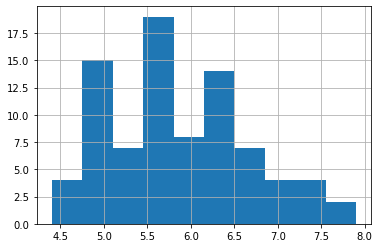

In [15]:
#sepal length histogram
train.sepal_length.hist()

<AxesSubplot:>

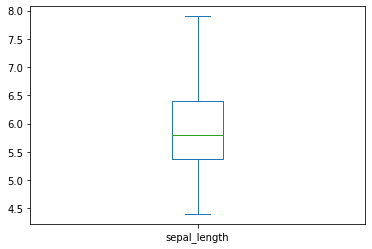

In [20]:
#sepal length boxplot
train.sepal_length.plot.box()

In [14]:
#sepal length descriptive stats
train.sepal_length.describe()

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

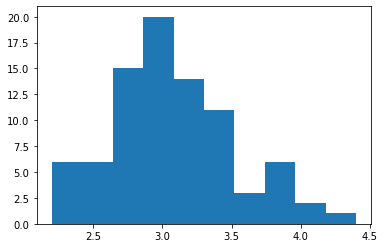

In [22]:
#sepal width histogram
plt.hist(train.sepal_width)
plt.show()

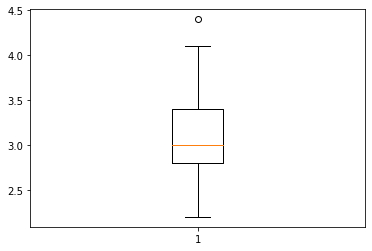

In [23]:
#sepal width boxplot
plt.boxplot(train.sepal_width)
plt.show()

In [24]:
#sepal width descriptive stats
train.sepal_width.describe()

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64

<AxesSubplot:>

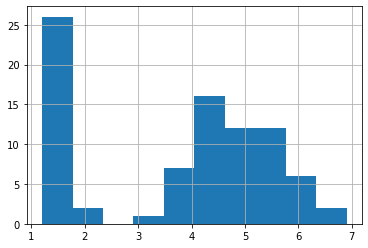

In [25]:
#petal length histogram
train.petal_length.hist()

<AxesSubplot:>

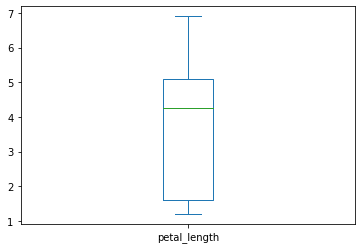

In [26]:
#petal length boxplot
train.petal_length.plot.box()

In [27]:
#petal length descriptive stats
train.petal_length.describe()

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

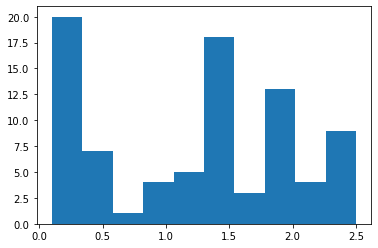

In [28]:
#petal width histogram
plt.hist(train.petal_width)
plt.show()

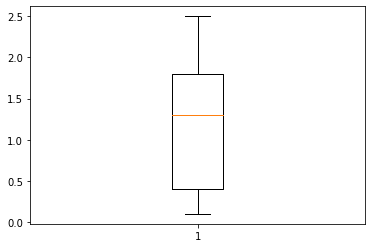

In [29]:
#petal width boxplot
plt.boxplot(train.petal_width)
plt.show()

In [30]:
#petal width descriptive stats
train.petal_width.describe()

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

#### Bivariate exploration

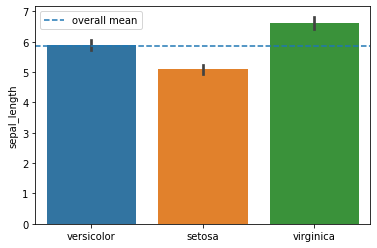

In [10]:
#plot sepal length against species and include mean line
mean_sl = train.sepal_length.mean()
sns.barplot('species_name', 'sepal_length', data=train)
plt.axhline(mean_sl, ls='--', label='overall mean') 
plt.xlabel('')
plt.legend()
plt.show()

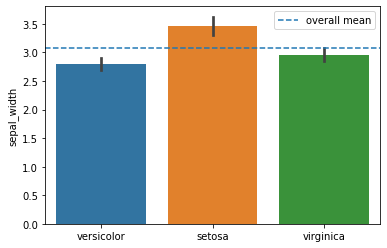

In [11]:
#plot sepal width against species and include mean line
mean_sw = train.sepal_width.mean()
sns.barplot('species_name', 'sepal_width', data=train)
plt.axhline(mean_sw, ls='--', label='overall mean')
plt.xlabel('')
plt.legend()
plt.show()

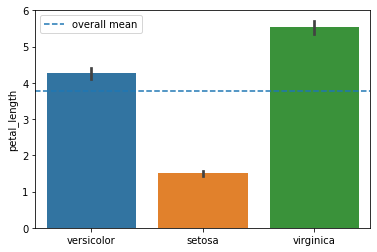

In [12]:
#plot petal length agains species and include mean line
mean_pl = train.petal_length.mean()
sns.barplot('species_name', 'petal_length', data=train)
plt.axhline(mean_pl, ls='--', label='overall mean')
plt.xlabel('')
plt.legend()
plt.show()

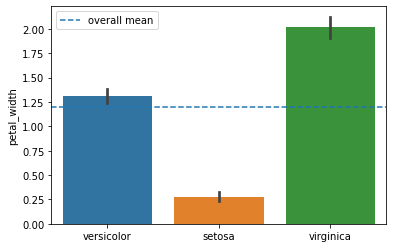

In [13]:
#plot petal width against species and include the mean line
mean_pw = train.petal_width.mean()
sns.barplot('species_name', 'petal_width', data=train)
plt.axhline(mean_pw, ls='--', label='overall mean')
plt.xlabel('')
plt.legend()
plt.show()

In [28]:
#assign a variable to a dataframe with only one species - 'versicolor'
x = train[train.species_name == 'versicolor']

In [36]:
#print the descriptive stats for the measurement variables for this species
print('species = versicolor')
print('=====')
print(x.sepal_length.describe()) 
print('-----')
print(x.sepal_width.describe())
print('-----')
print(x.petal_length.describe())
print('-----')
print(x.petal_width.describe())

species = versicolor
=====
count    28.000000
mean      5.896429
std       0.425556
min       4.900000
25%       5.600000
50%       5.800000
75%       6.125000
max       6.900000
Name: sepal_length, dtype: float64
-----
count    28.000000
mean      2.796429
std       0.280848
min       2.300000
25%       2.600000
50%       2.800000
75%       3.000000
max       3.400000
Name: sepal_width, dtype: float64
-----
count    28.000000
mean      4.271429
std       0.409930
min       3.300000
25%       4.000000
50%       4.250000
75%       4.525000
max       5.100000
Name: petal_length, dtype: float64
-----
count    28.000000
mean      1.314286
std       0.199470
min       1.000000
25%       1.200000
50%       1.300000
75%       1.500000
max       1.800000
Name: petal_width, dtype: float64


In [29]:
#assign a variable to a dataframe with only one species - 'setosa'
y = train[train.species_name == 'setosa']

In [15]:
train[train.species_name == 'setosa'].describe()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,28.0,28.000000,28.000000,28.000000,28.000000,28.00000
mean,1.0,23.642857,5.089286,3.467857,1.507143,0.27500
std,0.0,14.792927,0.360390,0.427788,0.184448,0.12057
min,1.0,2.000000,4.400000,2.300000,1.200000,0.10000
25%,1.0,11.250000,4.875000,3.275000,1.400000,0.20000
50%,1.0,22.500000,5.000000,3.400000,1.500000,0.20000
75%,1.0,36.250000,5.400000,3.800000,1.600000,0.40000
max,1.0,49.000000,5.800000,4.400000,1.900000,0.60000


In [35]:
#print the descriptive stats for the measurement variables for this species
print('species = setosa')
print('=====')
print(y.sepal_length.describe()) 
print('-----')
print(y.sepal_width.describe())
print('-----')
print(y.petal_length.describe())
print('-----')
print(y.petal_width.describe())

species = setosa
=====
count    28.000000
mean      5.089286
std       0.360390
min       4.400000
25%       4.875000
50%       5.000000
75%       5.400000
max       5.800000
Name: sepal_length, dtype: float64
-----
count    28.000000
mean      3.467857
std       0.427788
min       2.300000
25%       3.275000
50%       3.400000
75%       3.800000
max       4.400000
Name: sepal_width, dtype: float64
-----
count    28.000000
mean      1.507143
std       0.184448
min       1.200000
25%       1.400000
50%       1.500000
75%       1.600000
max       1.900000
Name: petal_length, dtype: float64
-----
count    28.00000
mean      0.27500
std       0.12057
min       0.10000
25%       0.20000
50%       0.20000
75%       0.40000
max       0.60000
Name: petal_width, dtype: float64


In [31]:
#assign a variable to a dataframe with only one species - 'virginica'
z = train[train.species_name == 'virginica']

In [34]:
#print the descriptive stats for the measurement variables for this species
print('species = virginica')
print('=====')
print(z.sepal_length.describe()) 
print('-----')
print(z.sepal_width.describe())
print('-----')
print(z.petal_length.describe())
print('-----')
print(z.petal_width.describe())

species = virginica
=====
count    28.000000
mean      6.625000
std       0.532378
min       5.800000
25%       6.300000
50%       6.450000
75%       6.900000
max       7.900000
Name: sepal_length, dtype: float64
-----
count    28.000000
mean      2.960714
std       0.318956
min       2.200000
25%       2.800000
50%       3.000000
75%       3.100000
max       3.800000
Name: sepal_width, dtype: float64
-----
count    28.000000
mean      5.535714
std       0.496815
min       4.800000
25%       5.100000
50%       5.500000
75%       5.800000
max       6.900000
Name: petal_length, dtype: float64
-----
count    28.000000
mean      2.021429
std       0.293582
min       1.500000
25%       1.800000
50%       2.000000
75%       2.300000
max       2.500000
Name: petal_width, dtype: float64


In [42]:
#using above df variables compare versicolor and virginica measurement variable means
#petal width compare
vir_pw = z.petal_width
ver_pw = x.petal_width

stats.mannwhitneyu(ver_pw, vir_pw)

MannwhitneyuResult(statistic=17.0, pvalue=6.47119166980993e-10)

In [43]:
#petal length compare
vir_pl = z.petal_length
ver_pl = x.petal_length
stats.mannwhitneyu(ver_pl, vir_pl)

MannwhitneyuResult(statistic=7.5, pvalue=2.9479835715150625e-10)

In [44]:
#sepal width compare
vir_sw = z.sepal_width
ver_sw = x.sepal_width
stats.mannwhitneyu(ver_sw, vir_sw)

MannwhitneyuResult(statistic=274.0, pvalue=0.05257259139845694)

In [45]:
#sepal length compare
vir_sl = z.sepal_length
ver_sl = x.sepal_length
stats.mannwhitneyu(ver_sl, vir_sl)

MannwhitneyuResult(statistic=107.5, pvalue=3.082029196534108e-06)

#### Multivariate exploration

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

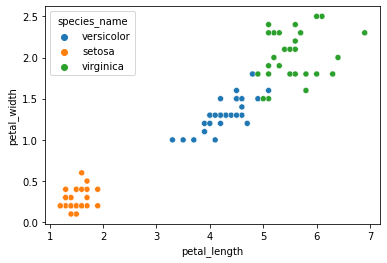

In [46]:
#petal length / petal width - hue = species
sns.scatterplot(x='petal_length', y='petal_width', hue='species_name', data=train)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

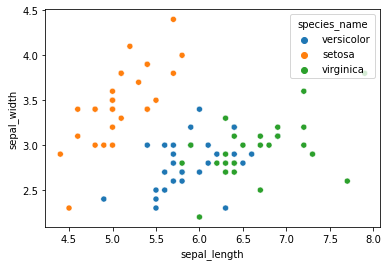

In [47]:
#sepal length / sepal width - hue = species
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species_name', data=train)

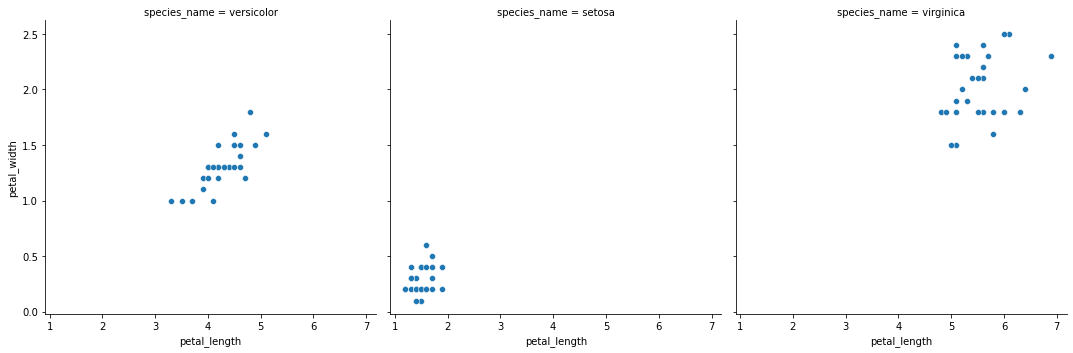

In [50]:
sns.relplot(x='petal_length', y='petal_width', col='species_name', data=train)

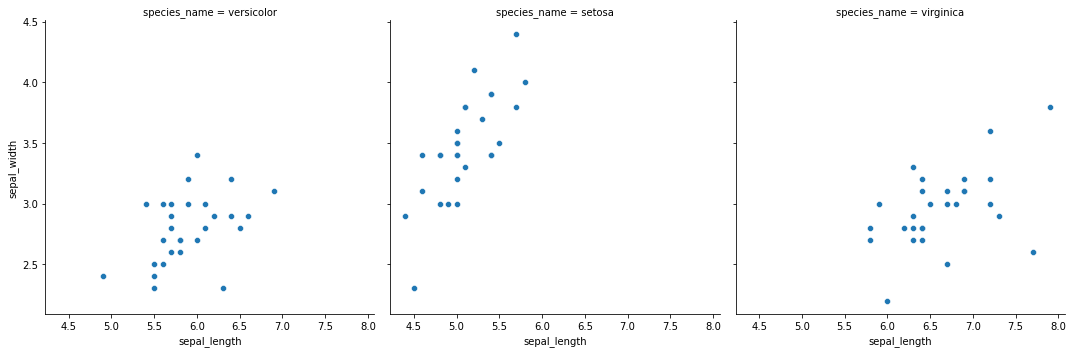

In [49]:
sns.relplot(x='sepal_length', y='sepal_width', col='species_name', data=train)

In [51]:
#melt the df measurement values
melt_df = train[['petal_length', 'petal_width', 'sepal_length', 'sepal_width', 'species_name']].melt(id_vars='species_name', var_name = 'measurement')

In [52]:
melt_df.head()

,species_name,measurement,value
0,versicolor,petal_length,3.5
1,setosa,petal_length,1.3
2,virginica,petal_length,5.1
3,versicolor,petal_length,4.2
4,setosa,petal_length,1.7


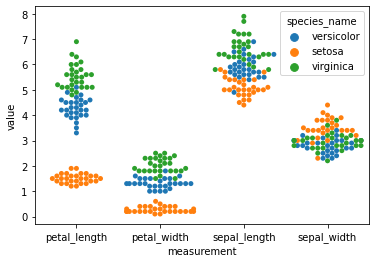

In [53]:
#plot the melt
sns.swarmplot(x='measurement', y='value', hue='species_name', data=melt_df)
plt.show()

In [55]:
#question = is petal area significantly different in virginica compared to setosa

#add a column that calculates the petal area for each observaiton
train['petal_area'] = train.petal_length * train.petal_width
train.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,petal_area
79,2,80,5.7,2.6,3.5,1.0,versicolor,3.50
36,1,37,5.5,3.5,1.3,0.2,setosa,0.26
133,3,134,6.3,2.8,5.1,1.5,virginica,7.65
95,2,96,5.7,3.0,4.2,1.2,versicolor,5.04
18,1,19,5.7,3.8,1.7,0.3,setosa,0.51


In [57]:
#split the data by species
setosa_train_with_p_area = train[train.species_name == 'setosa']
virginica_train_with_p_area = train[train.species_name == 'virginica']

In [58]:
#verify split
setosa_train_with_p_area.shape

(28, 8)

In [59]:
#verify split
virginica_train_with_p_area.shape

(28, 8)

In [60]:
#assign petal area by species to seperate variables
vir_pa = virginica_train_with_p_area.petal_area
set_pa = setosa_train_with_p_area.petal_area
#run the stats test on the two variables
stats.mannwhitneyu(vir_pa, set_pa)

MannwhitneyuResult(statistic=784.0, pvalue=1.3890181998497687e-10)

---

### 2. Explore your titanic dataset more completely.

- Determine drivers of the target variable
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.
- Does it make sense to combine any features?
- Do you find any surprises?
- Document any and all findings and takeaways in your notebook using markdown.


In [61]:
from acquire import get_titanic_data

In [68]:
#pull the titanic dataset
titanic_df = get_titanic_data()
titanic_df.head()

Reading from csv file...


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [69]:
#do a quick clean on the titanic dataset
titanic_df = titanic_df.drop(columns=['passenger_id', 'deck', 'class'])
titanic_df = titanic_df[~ titanic_df.age.isna()]
titanic_df = titanic_df[~ titanic_df.embarked.isna()]
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Southampton,0
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,S,Southampton,1
3,1,1,female,35.0,1,0,53.1000,S,Southampton,0
4,0,3,male,35.0,0,0,8.0500,S,Southampton,1


In [70]:
titanic_df.shape

(712, 10)

In [71]:
train, test = train_test_split(titanic_df, train_size = 0.8, stratify = titanic_df.survived, random_state=123)
train, validate = train_test_split(train, train_size = 0.7, stratify = train.survived, random_state=123)
train.shape, validate.shape, test.shape

((398, 10), (171, 10), (143, 10))

In [72]:
train.describe()

,survived,pclass,age,sibsp,parch,fare,alone
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.404523,2.211055,30.222161,0.500000,0.422111,37.093718,0.565327
std,0.491417,0.843215,14.595995,0.905483,0.838443,61.282772,0.496338
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000,0.000000
50%,0.000000,2.000000,29.000000,0.000000,0.000000,15.850000,1.000000
75%,1.000000,3.000000,40.000000,1.000000,1.000000,32.875000,1.000000
max,1.000000,3.000000,74.000000,5.000000,6.000000,512.329200,1.000000


<AxesSubplot:xlabel='pclass', ylabel='age'>

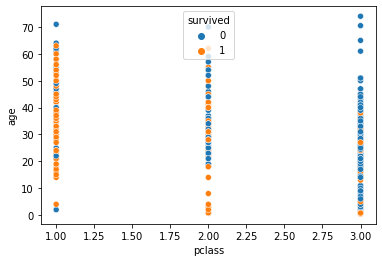

In [73]:
sns.scatterplot(x='pclass', y='age', hue='survived', data=train)

---

### 3. Explore your telco data to discover drivers of churn
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.
- What are your drivers of churn?
- Does it make sense to combine any features?
- Do you find any surprises?
- Document any and all findings and takeaways in your notebook using markdown.

In [63]:
from acquire import get_telco_data

In [64]:
telco_df = get_telco_data()
telco_df.head()

Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check
